In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gzip
import pyvista as pv
import scipy as sc
import math
%matplotlib qt

qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in ""


/home/silke/miniforge3/envs/xsuite/lib/python3.13/site-packages/pyvista/jupyter/notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


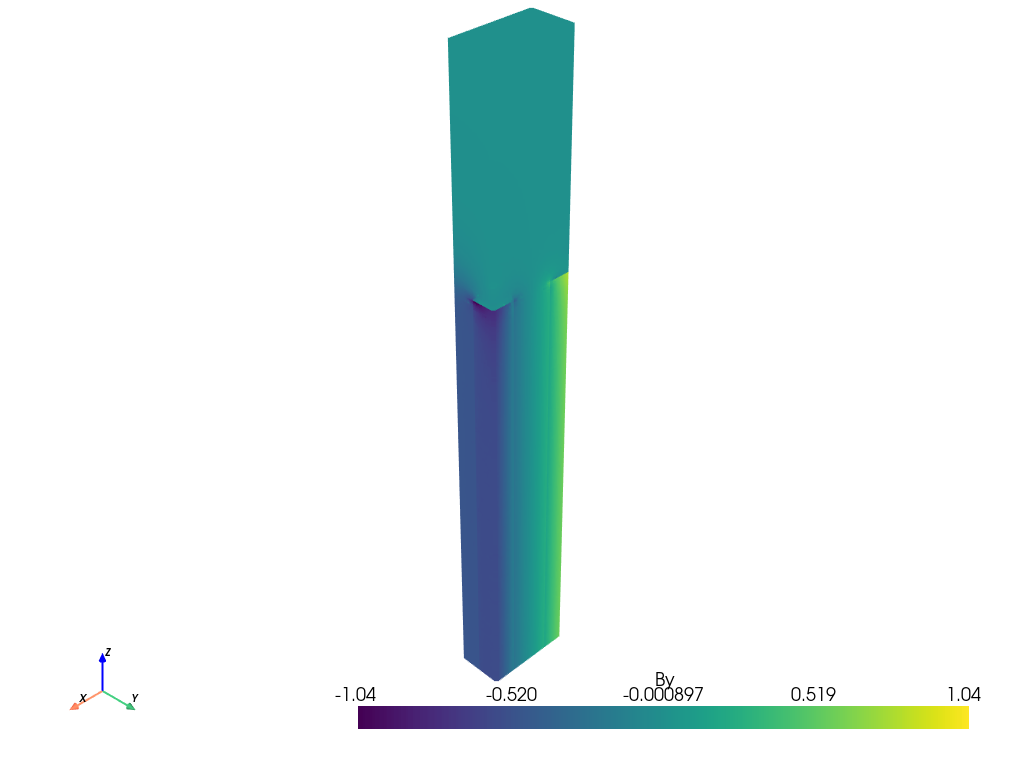

In [2]:
class quadrupole:
    def __init__(self, data):
        self.data = data
        self.src = pv.PolyData(self.data.T[:3].T)
        self.src['Bx'] = self.data.T[3].T
        self.src['By'] = self.data.T[4].T
        self.src['Bz'] = self.data.T[5].T

    def plot(self):
        self.src.plot(scalars="By")
        
    def plot_plane(self, xmin, xmax, nx, ymin, ymax, ny, zmin, zmax, nz, field, radius=0.01):
        x = np.linspace(xmin, xmax, nx)
        y = np.linspace(ymin, ymax, ny)
        z = np.linspace(zmin, zmax, nz)
        
        X, Y, Z = np.meshgrid(x, y, z)
        XYZ = np.array([X.flatten(), Y.flatten(), Z.flatten()]).T
        dst = pv.PolyData(XYZ).interpolate(self.src, radius=radius)
        
        dst.plot(scalars=field)
        
        
    


data_quad=np.loadtxt("field_map_straight_quad_resol_2mm.txt",skiprows=9)
quad = quadrupole(data)
quad.plot()

data_cutquad=np.loadtxt("field_map_quad_edge_30deg_resol_2mm.txt",skiprows=9)
cutquad = quadrupole(data_cutquad)
cutquad.plot()

/home/silke/miniforge3/envs/xsuite/lib/python3.13/site-packages/pyvista/jupyter/notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


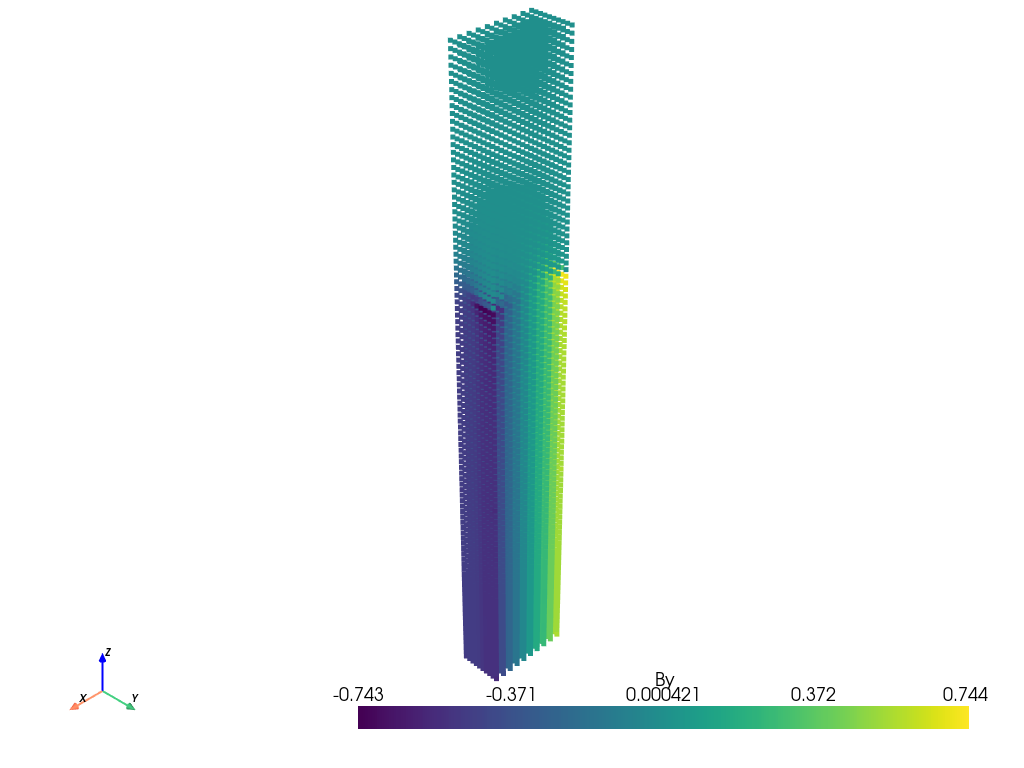

In [ ]:
quad.plot_plane(-0.05, 0.05, 10, 0, 0.05, 10, 0, 0.75, 100, "By")

/home/silke/miniforge3/envs/xsuite/lib/python3.13/site-packages/pyvista/jupyter/notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


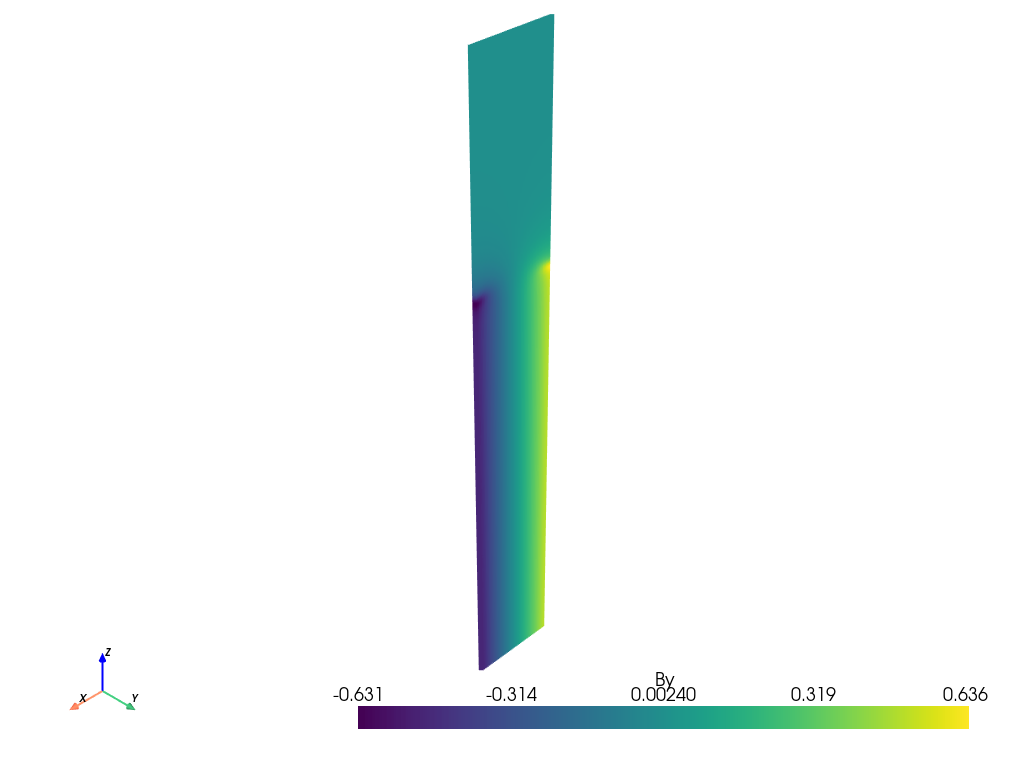

In [4]:
quad.plot_plane(-0.05, 0.05, 50, 0.025, 0.025, 1, 0, 0.75, 500, "By")

In [ ]:
cutquad.plot_plane(-0.05, 0.05, 50, 0.025, 0.025, 1, 0, 0.75, 500, "By")